In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv("Clean_data.csv")
df.head()

,index,City,Date,PM2.5,NO,NO2,CO,SO2,O3,AQI
0,28,Ahmedabad,2015-01-29,83.13,6.93,28.71,6.93,49.52,59.76,209.0
1,29,Ahmedabad,2015-01-30,79.84,13.85,28.68,13.85,48.49,97.07,328.0
2,30,Ahmedabad,2015-01-31,94.52,24.39,32.66,24.39,67.39,111.33,514.0
3,31,Ahmedabad,2015-02-01,135.99,43.48,42.08,43.48,75.23,102.70,782.0
4,32,Ahmedabad,2015-02-02,178.33,54.56,35.31,54.56,55.04,107.38,914.0


In [4]:
x=df.iloc[:,[3,4,5,6,7,8]]
y=df.iloc[:,9]

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(x, y)
y_pred=classifier.predict(x)
y_pred

array([272.49811047, 355.40731262, 512.57898412, ...,  82.22724326,
        75.39195333,  62.1934426 ])

In [7]:
print(classifier.coef_)

[ 1.23694683  0.21405652  0.33615669 10.83727804  0.8902396   0.30636702]


In [15]:
pred=pd.DataFrame(y_pred)
#sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([df['AQI'],pred],axis=1)
datasets.columns=['Actual AQI','AQI predicted']
datasets.to_csv('FInal_data.csv',index=False)

In [16]:
datasets

,Actual AQI,AQI predicted
0,209.0,272.498110
1,328.0,355.407313
2,514.0,512.578984
3,782.0,782.347273
4,914.0,938.352468
...,...,...
24692,41.0,69.531158
24693,70.0,86.882970
24694,68.0,82.227243
24695,54.0,75.391953


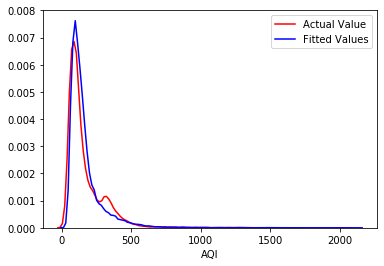

In [12]:
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)